In [111]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [10]:
x_train.shape

(50000, 32, 32, 3)

In [11]:
y_train.shape

(50000, 1)

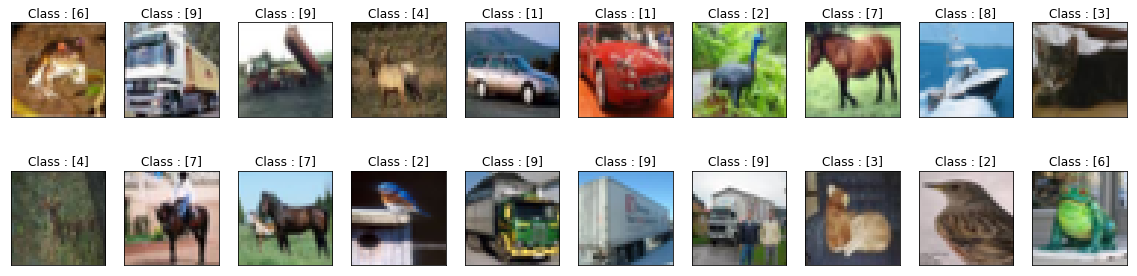

In [114]:
### Visualize some data
fig = plt.figure(figsize = (20,5))

for i in range(20):
    plt.subplot(2,10,i+1)
    plt.title('Class : '+ str(y_train[i]))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])

In [99]:
### Define the model and it's layers.
# You can experiment here for better accuracy.

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'same', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size = (2,2), strides = 2))
    
model.add(Conv2D(filters = 16, kernel_size = (3,3), strides = 1, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))


model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

model.add(Conv2D(filters = 32, kernel_size = (3,3), strides = 1, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))
    
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
#model.add(Dropout(rate = 0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [100]:
model.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

In [101]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_v1 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
activation_92 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 32, 32, 16)        64        
_________________________________________________________________
activation_93 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 16, 16, 16)        0         
__________

In [104]:
model.fit(x_train, y_train, epochs = 20)

Epoch 1/20
50000/50000 [==============================] - 165s 3ms/sample - loss: 0.5983 - acc: 0.7901
Epoch 2/20
50000/50000 [==============================] - 176s 4ms/sample - loss: 0.5502 - acc: 0.8047
Epoch 3/20
50000/50000 [==============================] - 175s 3ms/sample - loss: 0.5147 - acc: 0.8178
Epoch 4/20
50000/50000 [==============================] - 174s 3ms/sample - loss: 0.4736 - acc: 0.8323
Epoch 5/20
50000/50000 [==============================] - 174s 3ms/sample - loss: 0.4385 - acc: 0.8445
Epoch 6/20
50000/50000 [==============================] - 165s 3ms/sample - loss: 0.4074 - acc: 0.8558
Epoch 7/20
50000/50000 [==============================] - 164s 3ms/sample - loss: 0.3785 - acc: 0.8657
Epoch 8/20
50000/50000 [==============================] - 165s 3ms/sample - loss: 0.3517 - acc: 0.8746
Epoch 9/20
50000/50000 [==============================] - 172s 3ms/sample - loss: 0.3232 - acc: 0.8850
Epoch 10/20
50000/50000 [==============================] - 181s 4ms/sampl

In [105]:
### Evaluate the model on Test set.
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 11s 1ms/sample - loss: 1.3439 - acc: 0.7322
Test accuracy: 0.7322


In [106]:
predictions = model.predict(x_test)

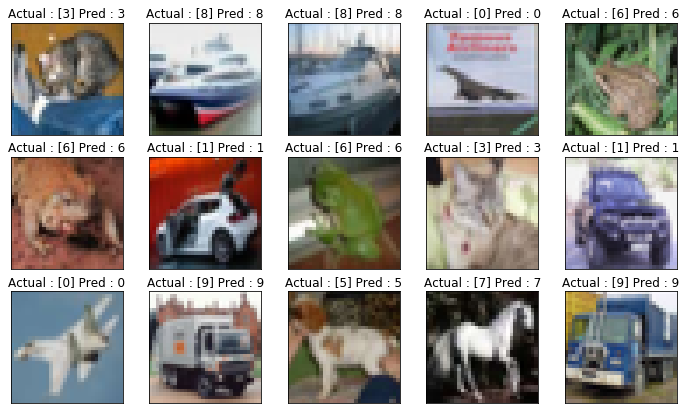

In [107]:
# Plot the predictions

fig = plt.figure(figsize=(12,7))

for i in range(15):
    plt.subplot(3,5,i+1)
    plt.title('Actual : '+str(y_test[i])+' Pred : '+str(np.argmax(predictions[i])))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap = 'gray')

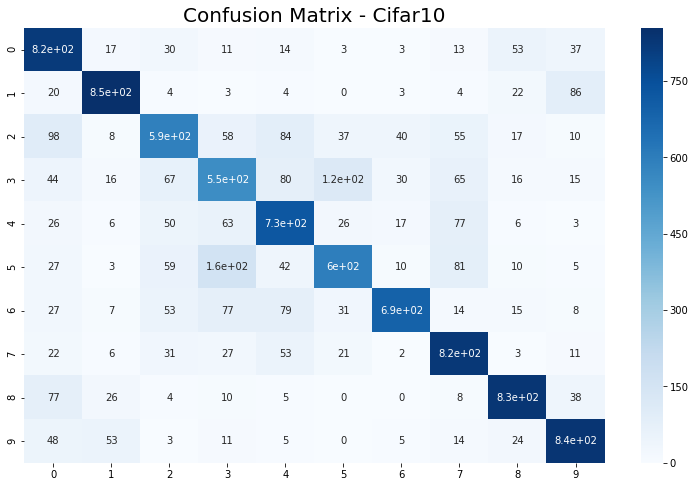

In [112]:
### Generate the Confusion Matrix

y_predictions = np.array([np.argmax(predictions[i]) for i in range(len(predictions))])
matrix = confusion_matrix(y_test, y_predictions)

df_cm = pd.DataFrame(matrix, index = [i for i in '0123456789'], columns = [i for i in "0123456789"])
plt.figure(figsize = (13,8))
plt.title('Confusion Matrix - Cifar10', fontsize = 20)
sns.heatmap(df_cm, annot=True, cmap="Blues")